This notebook contains some common commands to use OpenCV.

# OpenCV 101

## Dependencies

In [ ]:
!pip install opencv-python matplotlib

In [3]:
import cv2
from pathlib import Path
from matplotlib import pyplot as plt

# Images

## Read

In [ ]:
IMG_DIR = Path() / 'data' / 'images'

In [ ]:
img = cv2.imread(IMG_DIR / 'silvio.jpeg') # img is an array
img.shape

## Render

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
recolor = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(recolor)
plt.show()

Change color to gray.

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
plt.imshow(gray)
plt.show()

## Write

In [ ]:
cv2.imwrite(IMG_DIR / 'silvio_gray.jpg', gray)

# Videos

From https://www.youtube.com/watch?v=mEzBnhJPUjc

## Read using Captures

In [ ]:
VID_DIR = Path() / 'data' / 'videos'

In [39]:
# Setup capture to video 
cap = cv2.VideoCapture(VID_DIR / 'coders.mp4')

In [17]:
# Grab a frame
ret, frame = cap.read()

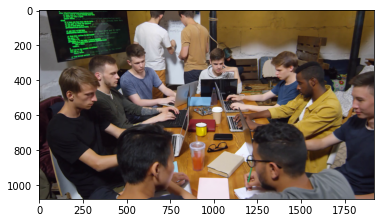

In [24]:
# Render frame 
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
# Release capture
cap.release()
cv2.destroyAllWindows()

In [28]:
cap.read()

(True,
 array([[[157, 142, 143],
         [157, 142, 143],
         [157, 142, 143],
         ...,
         [ 27,  88, 117],
         [ 28,  89, 118],
         [ 28,  89, 118]],
 
        [[157, 142, 143],
         [157, 142, 143],
         [157, 142, 143],
         ...,
         [ 27,  88, 117],
         [ 28,  89, 118],
         [ 28,  89, 118]],
 
        [[157, 142, 143],
         [157, 142, 143],
         [157, 142, 143],
         ...,
         [ 27,  88, 117],
         [ 28,  89, 118],
         [ 28,  89, 118]],
 
        ...,
 
        [[ 48,  58,  62],
         [ 49,  59,  63],
         [ 51,  61,  65],
         ...,
         [ 95, 113, 154],
         [ 95, 113, 154],
         [ 95, 113, 154]],
 
        [[ 49,  59,  63],
         [ 51,  61,  65],
         [ 53,  63,  67],
         ...,
         [ 97, 113, 154],
         [ 97, 113, 154],
         [ 97, 113, 154]],
 
        [[ 51,  61,  65],
         [ 53,  63,  67],
         [ 54,  64,  68],
         ...,
         [ 97, 113, 1

## Capture properties

In [40]:
# Height
cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

1080.0

In [41]:
# Width
cap.get(cv2.CAP_PROP_FRAME_WIDTH)

1920.0

In [42]:
# Get number of frames
cap.get(cv2.CAP_PROP_FRAME_COUNT)

420.0

In [43]:
# Frames per second
cap.get(cv2.CAP_PROP_FPS)

25.0

## Process videos (frame-by-frame) and save using `cv2.VideoWriter`

In [ ]:
# Establish capture
cap = cv2.VideoCapture(VID_DIR / 'coders.mp4')

# Properties
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = cap.get(cv2.CAP_PROP_FPS)

# Video Writer
video_writer = cv2.VideoWriter(os.path.join('data','output','output.avi'),
                               cv2.VideoWriter_fourcc('P','I','M','1'), fps, (width, height), isColor=False) 
                                                                                        
# Loop through each frame
for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    
    # Read frame 
    ret, frame = cap.read()
    
    # Gray transform
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Show image
    cv2.imshow('Video Player', gray)
    
    # Write out frame 
    video_writer.write(gray)
    
    # Breaking out of the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Close down everything
cap.release()
cv2.destroyAllWindows()

# Release video writer
video_writer.release()

# Webcam

From https://www.youtube.com/watch?v=FygLqV15TxQ

## Connecting to Your Webcam

In [ ]:
# Connect to capture device
cap = cv2.VideoCapture(0)

In [7]:
# Get a frame from the capture device
ret, frame = cap.read()

In [4]:
print(ret)

True


In [5]:
print(frame)

[[[101 108 143]
  [105 111 146]
  [108 115 150]
  ...
  [150 158 163]
  [138 146 151]
  [127 134 140]]

 [[108 115 150]
  [107 115 147]
  [109 117 149]
  ...
  [150 158 163]
  [141 148 154]
  [129 137 142]]

 [[109 116 151]
  [108 116 148]
  [109 117 149]
  ...
  [152 159 167]
  [149 156 163]
  [144 151 159]]

 ...

 [[ 70  65  59]
  [ 67  63  57]
  [ 64  60  53]
  ...
  [180 208 219]
  [177 205 216]
  [177 205 216]]

 [[ 71  67  60]
  [ 69  64  58]
  [ 67  63  57]
  ...
  [178 206 217]
  [170 197 210]
  [171 198 212]]

 [[ 71  67  60]
  [ 69  64  58]
  [ 67  63  57]
  ...
  [178 206 217]
  [174 202 215]
  [181 209 222]]]


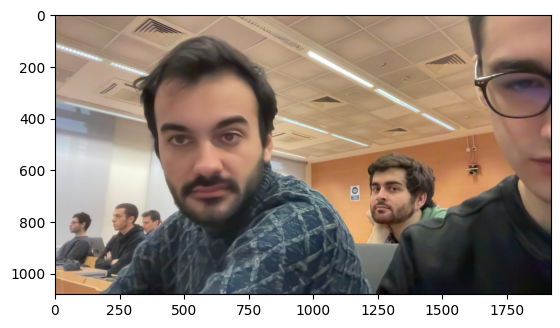

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
# Releases capture back into the wild 
cap.release()

In [10]:
def take_photo(): 
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cv2.imwrite(os.path.join('data','output','webcamphoto.jpg'), frame)
    cap.release()

## Rendering in Real Time

In [ ]:
# Connect to webcam
cap = cv2.VideoCapture(0)
# Loop through every frame until we close our webcam
while cap.isOpened(): 
    ret, frame = cap.read()
    
    # Show image 
    cv2.imshow('Webcam', frame)
    
    # Checks whether q has been hit and stops the loop
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

# Releases the webcam
cap.release()
# Closes the frame
cv2.destroyAllWindows()